В этой тетрадке для примера рассмотрим таблицу значений для теста PRO и проанализируем цветовые характеристики.
![table](../doc/Multistix-Urinalysis-Color-Key.png)

In [3]:
from stripes import palette
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8
from mpl_toolkits.mplot3d import Axes3D

In [6]:
import colorsys

In [7]:
test_point_rgb = (247, 242, 198)
test_point_hsv = colorsys.rgb_to_hsv(*test_point_rgb)
test_point_hsv[-1]

247

In [9]:
points = palette.PRO_points
points = np.array(points)
target = palette.PRO_target
units = palette.PRO_units
corr = palette.PRO_corr

Начнем с RGB:

In [11]:
xs_rgb = points[:, 0]
ys_rgb = points[:, 1]
zs_rgb = points[:, 2]

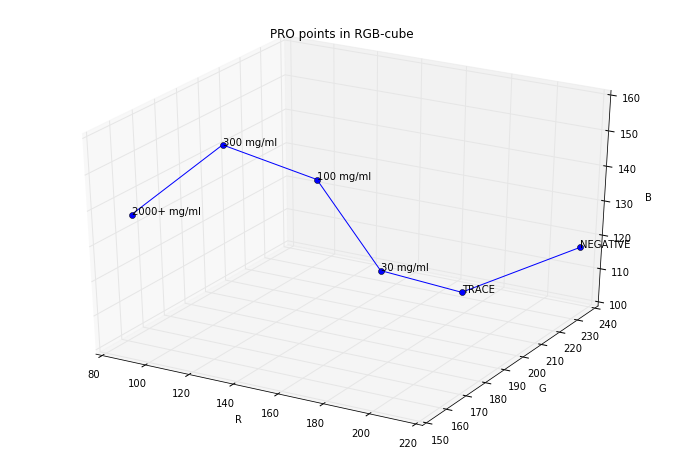

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs_rgb, ys_rgb, zs_rgb, marker='o')
ax.set_title("PRO points in RGB-cube")
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
for j in xrange(6):
    ax.text(xs_rgb[j], ys_rgb[j], zs_rgb[j], s=corr[target[j]])

На отдельных каналах:

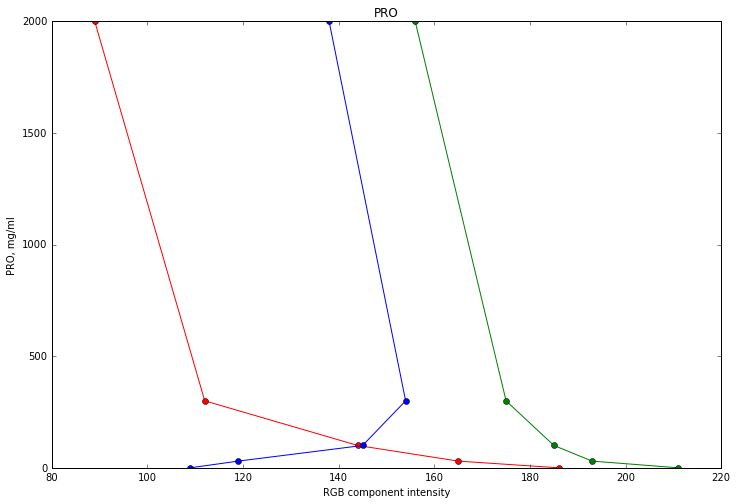

In [53]:
v = np.array([0, 30, 100, 300, 2000])
for j, x in enumerate([xs_rgb, ys_rgb, zs_rgb]):
    plt.title("PRO")
    plt.plot(x[1:], np.array(v), c="rgb"[j], marker='o')
    plt.xlabel("RGB component intensity")
    plt.ylabel("PRO, mg/ml")
    plt.legend()

HSV:

In [44]:
points_hsv = np.array([colorsys.rgb_to_hsv(*point) for point in points])

xs_hsv = points_hsv[:, 0]
ys_hsv = points_hsv[:, 1]
zs_hsv = points_hsv[:, 2]

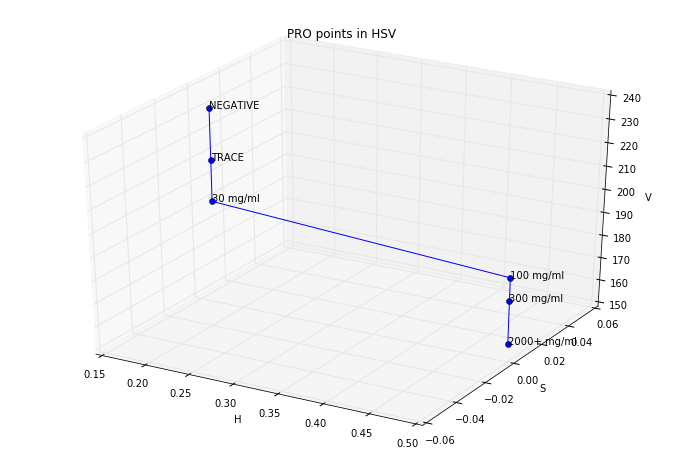

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs_hsv, ys_hsv, zs_hsv, marker='o')
ax.set_title("PRO points in HSV")
ax.set_xlabel('H')
ax.set_ylabel('S')
ax.set_zlabel('V')
for j in xrange(6):
    ax.text(xs_hsv[j], ys_hsv[j], zs_hsv[j], s=corr[target[j]])

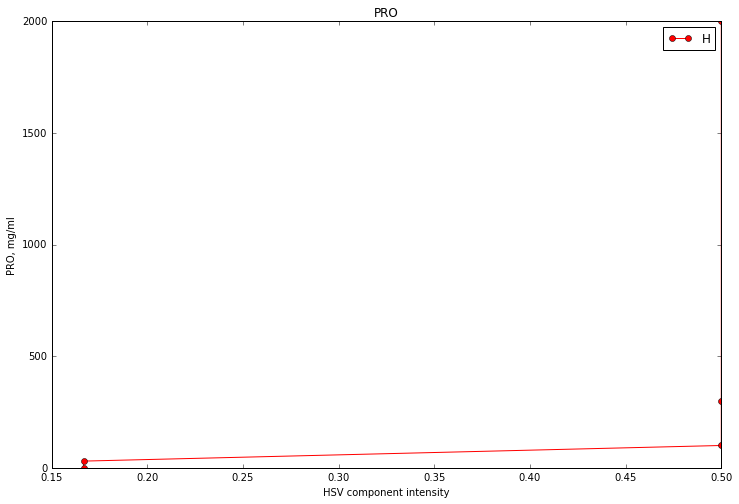

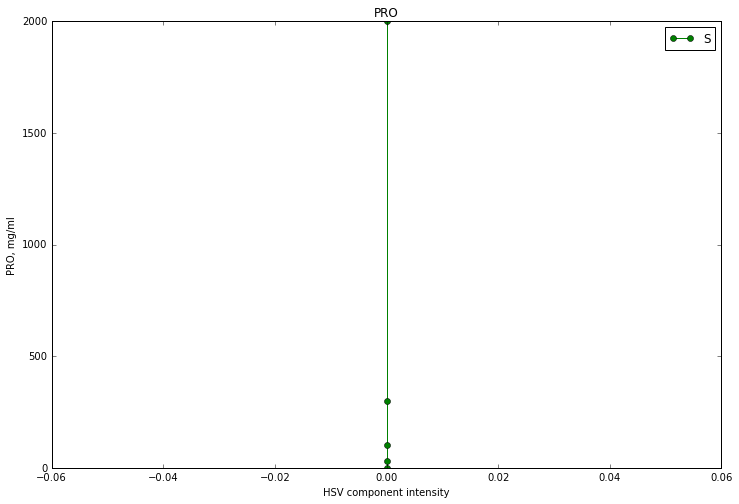

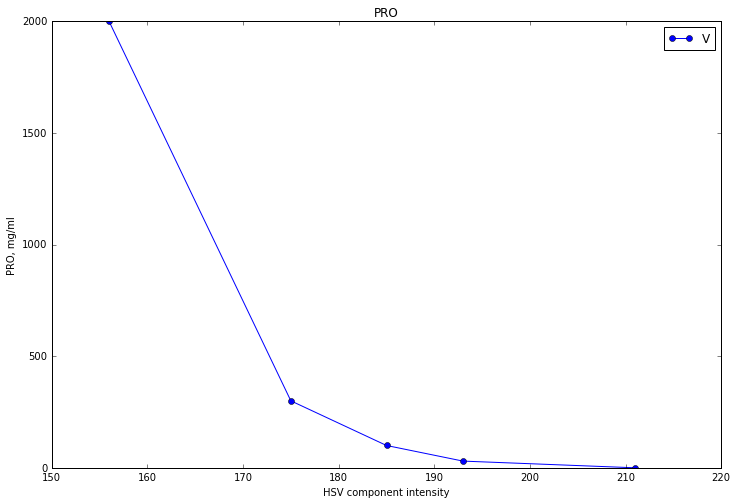

In [48]:
v = [0, 30, 100, 300, 2000]
for j, x in enumerate([xs_hsv, ys_hsv, zs_hsv]):
    plt.title("PRO")
    plt.plot(x[1:], np.array(v), c="rgb"[j], marker='o', label="HSV"[j])
    plt.xlabel("HSV component intensity")
    plt.ylabel("PRO, mg/ml")
    plt.legend()
    plt.show()

Попробуем МНК на V:

In [51]:
from scipy.stats import linregress

In [54]:
fits = linregress(xs_hsv[1:], np.log(v))
print fits

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)


/home/lysuhin/Distr/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [55]:
x_grid = np.linspace(100, 250, 50)
y_grid = fits.intercept + fits.slope * x_grid

/home/lysuhin/Distr/anaconda2/lib/python2.7/site-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


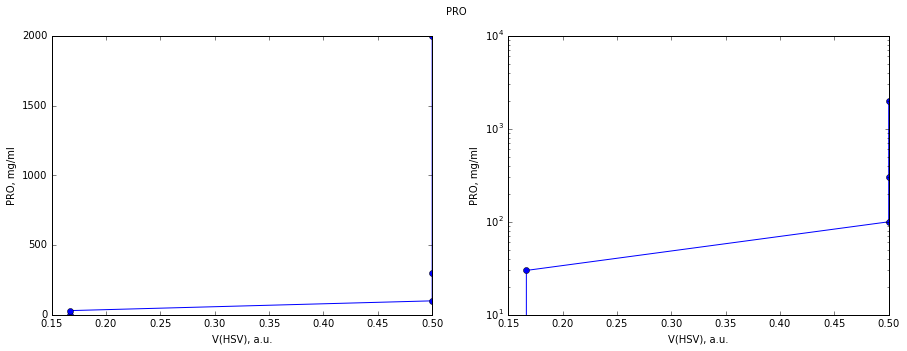

In [59]:
plt.figure(figsize=(15, 5))
plt.suptitle("PRO")
plt.subplot(1, 2, 1)
plt.ylabel("PRO, mg/ml")
plt.xlabel("V(HSV), a.u.")
# plt.scatter(test_point_hsv)
plt.plot(xs_hsv[1:], v, marker="o")
plt.subplot(1, 2, 2)
plt.ylabel("PRO, mg/ml")
plt.xlabel("V(HSV), a.u.")
plt.plot(xs_hsv[1:], v, marker="o")
plt.yscale('log')
plt.plot(x_grid, np.exp(y_grid))
# plt.yscale('log')

In [40]:
points_hls = np.array([colorsys.rgb_to_hls(*point) for point in points])

In [43]:
points_hls

array([[  1.66666667e-01,   1.76000000e+02,  -3.25714286e-01],
       [  1.66666667e-01,   1.60000000e+02,  -3.20754717e-01],
       [  1.66666667e-01,   1.56000000e+02,  -2.38709677e-01],
       [  5.00000000e-01,   1.64500000e+02,  -1.25382263e-01],
       [  5.00000000e-01,   1.43500000e+02,  -2.21052632e-01],
       [  5.00000000e-01,   1.22500000e+02,  -2.75720165e-01]])

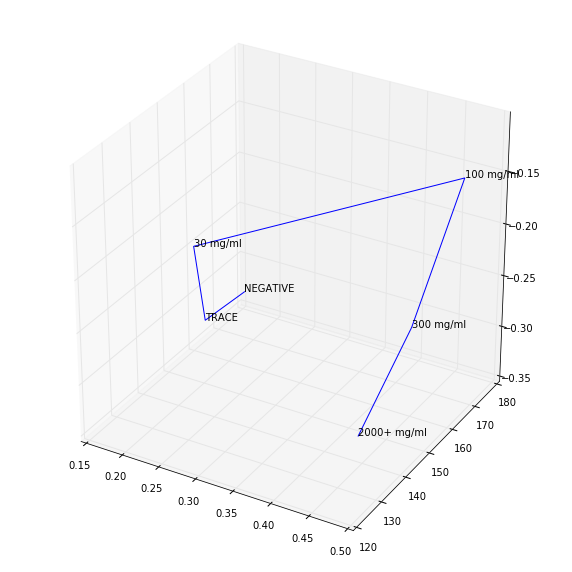

In [42]:
xs = points_hls[:, 0]
ys = points_hls[:, 1]
zs = points_hls[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs)
for j in xrange(6):
    ax.text(xs[j], ys[j], zs[j], s=corr[target[j]])

In [44]:
points_yiq = np.array([colorsys.rgb_to_yiq(*point) for point in points])

In [46]:
points_yiq

array([[ 216.56,   28.68,  -38.07],
       [ 192.28,   17.64,  -36.87],
       [ 176.46,    6.88,  -28.82],
       [ 168.3 ,  -11.8 ,  -21.01],
       [ 153.79,  -31.08,  -19.74],
       [ 133.92,  -34.44,  -19.65]])

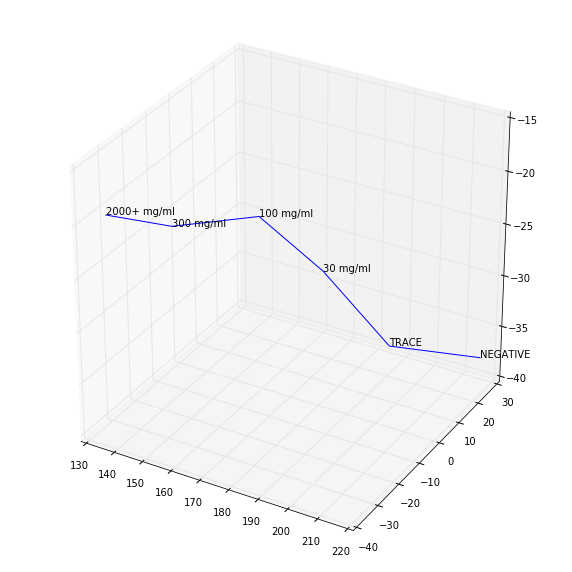

In [45]:
xs = points_yiq[:, 0]
ys = points_yiq[:, 1]
zs = points_yiq[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs)
for j in xrange(6):
    ax.text(xs[j], ys[j], zs[j], s=corr[target[j]])